# ARIMA - Forecast

## Reading Data Set Again from the Excel

In [1]:
import pandas as pd
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Use Interpolation to Fill Missing Values

In [2]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Plotting the Pettah Average Price

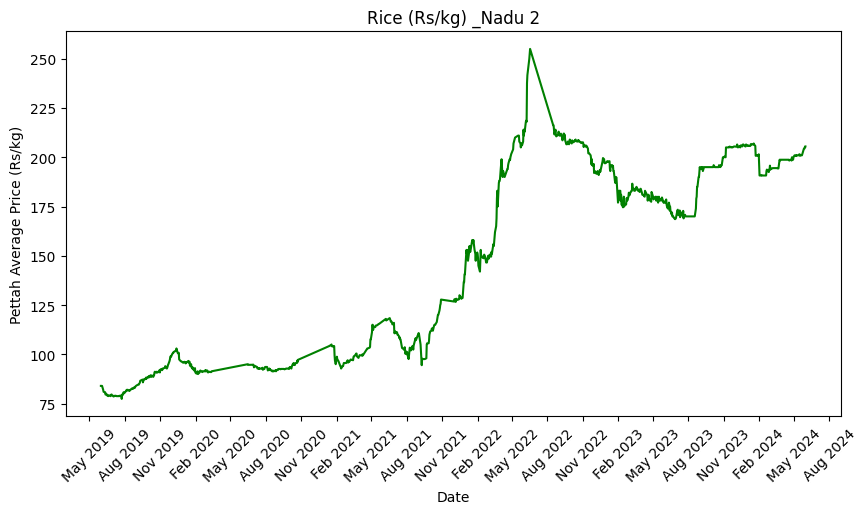

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [4]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint'], inplace=True)


In [5]:
filtered_df = filtered_df.drop('index', axis=1) 

In [6]:
filtered_df.tail(15)

,date,pettah_average
1813,2024-05-17,200.750000
1814,2024-05-18,200.833333
1815,2024-05-19,200.916667
1816,2024-05-20,201.000000
1817,2024-05-21,201.000000
1818,2024-05-22,201.000000
1819,2024-05-23,201.666000
1820,2024-05-24,202.332000
1821,2024-05-25,202.998000
1822,2024-05-26,203.664000


## Set Date into index Column 

In [7]:
# Convert 'date' column to datetime if it's not already
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set 'date' as the index of the DataFrame
filtered_df.set_index('date', inplace=True)

## Seasonal Decomposition

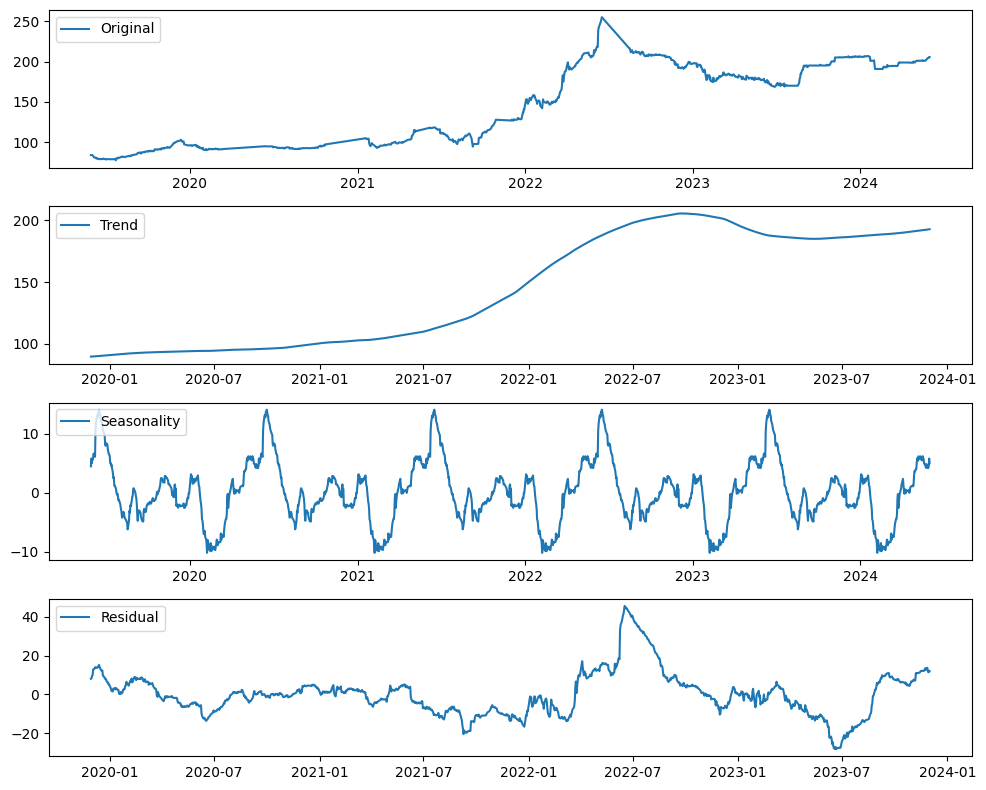

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Create Dataframe with Time Series Components

In [9]:
# df = pd.DataFrame({
#     'Trend': decomposition.trend,
#     'Seasonal': decomposition.seasonal,
#     'Residuals': decomposition.resid,
#     'Original': decomposition.observed
# })
# df = df.reset_index()

# df.head(7)

# # df.to_csv('decomposition.csv', index=False)

## Train Test Split

In [15]:
test_data = 7

train = filtered_df[:-test_data]
test = filtered_df[-test_data:]

test

,pettah_average
date,
2024-05-25,202.998
2024-05-26,203.664
2024-05-27,204.330
2024-05-28,204.500
2024-05-29,204.500
2024-05-30,205.500
2024-05-31,205.500


## Use Auto ARIMA for 7 Day Prediction

In [11]:
from pmdarima import auto_arima

# ARIMA Model

arima_model = auto_arima(train['pettah_average'],seasonal=False)

print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -2779.933
Date:                Fri, 08 Nov 2024   AIC                           5573.866
Time:                        15:12:22   BIC                           5612.412
Sample:                    05-31-2019   HQIC                          5588.087
                         - 05-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6375      0.088     18.516      0.000       1.464       1.811
ar.L2         -0.6981      0.081     -8.606      0.000      -0.857      -0.539
ma.L1         -1.5440      0.088    -17.527      0.0

In [12]:
# Predicting with the ARIMA Model

test_predictions = arima_model.predict(n_periods=len(test))

test_predictions

2024-05-25    202.403810
2024-05-26    202.437221
2024-05-27    202.493772
2024-05-28    202.589084
2024-05-29    202.705686
2024-05-30    202.830094
2024-05-31    202.952422
Freq: D, dtype: float64

## ARIMA Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , mean_absolute_percentage_error
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(test['pettah_average'], test_predictions)
mae = mean_absolute_error(test['pettah_average'], test_predictions)
mse = mean_squared_error(test['pettah_average'], test_predictions , squared=False)
mape = mean_absolute_percentage_error(test['pettah_average'], test_predictions) * 100
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error (MAE): 1.7971300155974828
Mean Squared Error (MSE): 1.9168237299081055
Root Mean Squared Error (RMSE): 1.384494033901232
Mean Absolute Percentage Error: 0.8777841954986062


c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
